[Нейронные сети, персептрон](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8,_%D0%BF%D0%B5%D1%80%D1%86%D0%B5%D0%BF%D1%82%D1%80%D0%BE%D0%BD)

**scikit-learn**

In [1]:
# Load required libraries
import numpy as np

from sklearn import datasets

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron # Single-layer perceptron
from sklearn.neural_network import MLPClassifier # Multilayer perceptron 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Load the mnist dataset
mnist = datasets.load_digits()

In [3]:
# Create our X and y data
n_samples = len(mnist.images)

X = mnist.images.reshape((n_samples, -1))
y = mnist.target

In [4]:
# Split the data into 70% training data and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
# Train the scaler, which standarizes all the features to have mean=0 and unit variance
sc = StandardScaler()
sc.fit(X_train)

# Apply the scaler to the X training data
X_train_std = sc.transform(X_train)

# Apply the SAME scaler to the X test data
X_test_std = sc.transform(X_test)

In [6]:
# Create a single-layer perceptron object with the parameters: 
# 40 iterations (epochs) over the data, and a learning rate of 0.1
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0)

# Create a multilayer perceptron object
mppn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(256, 512, 128), random_state=1)

In [7]:
# Train the perceptrons
ppn.fit(X_train_std, y_train)
mppn.fit(X_train_std, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(256, 512, 128), random_state=1,
              solver='lbfgs')

In [8]:
# Apply the trained perceptrons on the X data to make predicts for the y test data
y_pred = ppn.predict(X_test_std)
multi_y_pred = mppn.predict(X_test_std)

In [9]:
# View the accuracies of the model, which is: 1 - (observations predicted wrong / total observations)
print('Single-layer perceptron accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('Multilayer perceptron accuracy: %.4f' % accuracy_score(y_test, multi_y_pred))

Single-layer perceptron accuracy: 0.9296
Multilayer perceptron accuracy: 0.9722


---

**tensorflow**

[Single Layer Perceptron in TensorFlow](https://www.geeksforgeeks.org/single-layer-perceptron-in-tensorflow/)

In [32]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [33]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


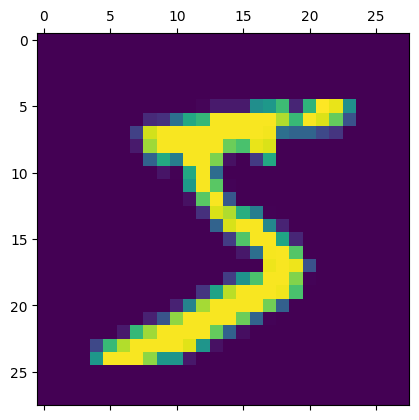

In [34]:
len(x_train)
len(x_test)
x_train[0].shape
plt.matshow(x_train[0])

In [35]:
# Normalizing the dataset
x_train = x_train/255
x_test = x_test/255
  
# Flatting the dataset in order
# to compute for model building
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)

In [36]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
  
model.fit(x_train_flatten, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 25us/sample - loss: 0.4689 - acc: 0.8783
Epoch 2/5
60000/60000 [==============================] - 2s 25us/sample - loss: 0.3040 - acc: 0.9157
Epoch 3/5
60000/60000 [==============================] - 1s 25us/sample - loss: 0.2839 - acc: 0.9198
Epoch 4/5
60000/60000 [==============================] - 1s 24us/sample - loss: 0.2731 - acc: 0.9235
Epoch 5/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2668 - acc: 0.9255


In [37]:
model.evaluate(x_test_flatten, y_test)

C:\Python310\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


[0.26816755527853964, 0.924]